In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [2]:
shapes = gpd.read_file("data/gadm36_RUS_1_fixed.json")
# shapes.to_crs = "+init=epsg:3413 +lon_0=105"
shapes.shape

(85, 2)

In [3]:
rolling_weeks = pd.read_csv("data/covid19ru_rolling_weeks.csv")
rolling_weeks.shape

(170, 5)

In [4]:
rolling_weeks_sick_new = rolling_weeks.set_index(["region_name", "week"])[["sick_new"]].unstack().reset_index()
rolling_weeks_sick_new.columns = ["region_name", "sick_new_last_week", "sick_new_previous_week"]
rolling_weeks_sick_new["sick_temp_increase"] = rolling_weeks_sick_new.sick_new_last_week / rolling_weeks_sick_new.sick_new_previous_week - 1

In [5]:
gdf = shapes.merge(rolling_weeks_sick_new)
gdf.head(3)

,region_name,geometry,sick_new_last_week,sick_new_previous_week,sick_temp_increase
0,Республика Адыгея,"POLYGON ((39.65986 43.99760, 39.69266 44.00782...",574.0,639.0,-0.101721
1,Алтайский край,"POLYGON ((82.80364 50.94067, 82.78856 50.94470...",1472.0,1511.0,-0.025811
2,Амурская область,"POLYGON ((131.38809 49.25325, 131.28198 49.250...",942.0,980.0,-0.038776


<AxesSubplot:>

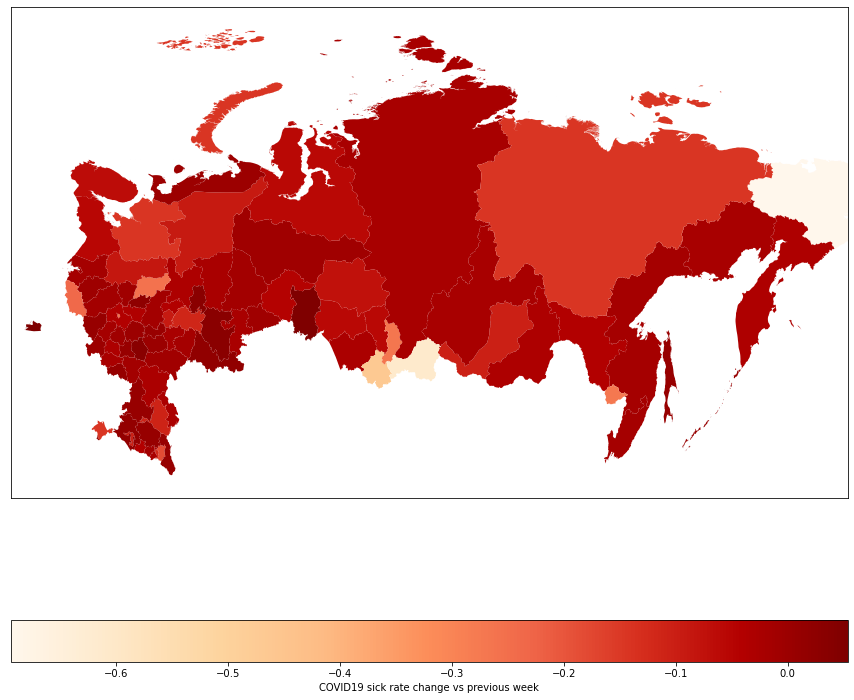

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(15, 15))

ax.set_xticks([])
ax.set_yticks([])
ax.set_xlim(17, 177)

gdf.plot(ax=ax, column="sick_temp_increase", legend=True, cmap="OrRd",
        legend_kwds={"label": "COVID19 sick rate change vs previous week",
                    "orientation": "horizontal"})